In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

## **Create data**

In [14]:
num_data = 3000
x1 = np.random.rand(num_data) *10
x2 = np.random.rand(num_data) *10
e = np.random.normal(0, 0.8, num_data)
X= np.array([x1,x2]).T  # T for transpose from (2, 2400) to (2400, 2)
y=2*np.sin(x1) + np.log(0.5*x2**2)+e

In [15]:
train_X, train_y = X[:2000, :], y[:2000]
val_X, val_y = X[2000:2500, :], y[2000:2500]
test_X, test_y = X[2500:, :], y[2500:]

## **Plotting Data**

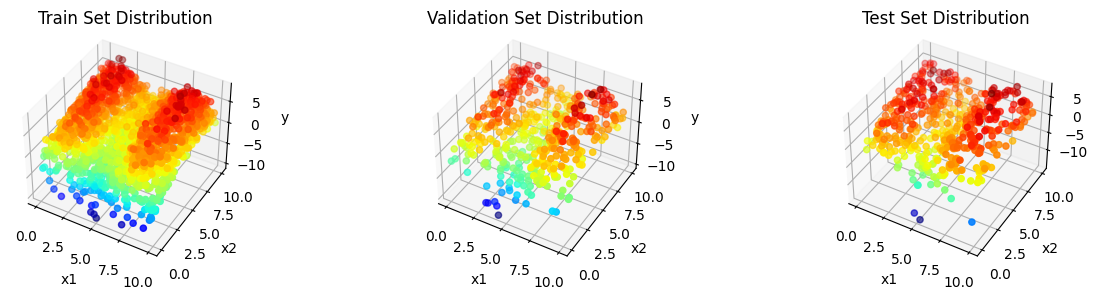

In [26]:
fig = plt.figure(figsize=(15,3))

ax1 = fig.add_subplot(1, 3, 1, projection='3d') # size 1 row, 3 col, location 1
ax1.scatter(train_X[:, 0], train_X[:,1], train_y, c=train_y, cmap='jet')

ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.set_title('Train Set Distribution')
ax1.view_init(40, -60) #view angle

ax2 = fig.add_subplot(1, 3, 2, projection='3d') # size 1 row, 3 col, location 2
ax2.scatter(val_X[:, 0], val_X[:,1], val_y, c=val_y, cmap='jet')

ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')
ax2.set_title('Validation Set Distribution')
ax2.view_init(40, -60) #view angle


ax3 = fig.add_subplot(1, 3, 3, projection='3d') # size 1 row, 3 col, location 3
ax3.scatter(test_X[:, 0], test_X[:,1], test_y, c=test_y, cmap='jet')

ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('y')
ax3.set_title('Test Set Distribution')
ax3.view_init(40, -60) #view angle

plt.show()

## **Model(Hypothesis) Define**

In [17]:
import tensorflow as tf

In [18]:
input_shape = (2,)

In [19]:
tf.random.set_seed(42)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=input_shape, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear'),
])

In [20]:
# Configure the model and start training
# Configure the model and start training

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(loss='mean_absolute_error', optimizer= optimizer, metrics=['mean_squared_error'])
history = model.fit(train_X, train_y, epochs=100, batch_size=5, verbose=1, validation_data=(val_X, val_y))

Epoch 1/100
400/400 [==============================] - 1s 2ms/step - loss: 3.1253 - mean_squared_error: 12.8393 - val_loss: 2.8802 - val_mean_squared_error: 11.3269
Epoch 2/100
400/400 [==============================] - 1s 2ms/step - loss: 2.8224 - mean_squared_error: 10.7729 - val_loss: 2.6286 - val_mean_squared_error: 9.7700
Epoch 3/100
400/400 [==============================] - 1s 1ms/step - loss: 2.5352 - mean_squared_error: 8.9598 - val_loss: 2.3169 - val_mean_squared_error: 7.9951
Epoch 4/100
400/400 [==============================] - 1s 1ms/step - loss: 2.2062 - mean_squared_error: 7.0461 - val_loss: 2.0045 - val_mean_squared_error: 6.3240
Epoch 5/100
400/400 [==============================] - 1s 2ms/step - loss: 1.9030 - mean_squared_error: 5.4763 - val_loss: 1.7546 - val_mean_squared_error: 5.1376
Epoch 6/100
400/400 [==============================] - 1s 1ms/step - loss: 1.6945 - mean_squared_error: 4.5290 - val_loss: 1.6445 - val_mean_squared_error: 4.5607
Epoch 7/100
400/400

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                30        
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


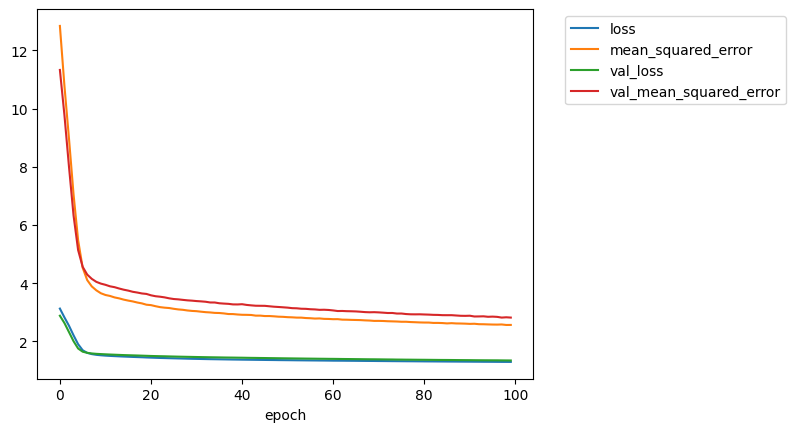

In [22]:
pd.DataFrame(history.history).plot()
plt.xlabel("epoch")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [23]:
mse_test, rmse_test = model.evaluate(test_X, test_y)
y_pred = model.predict(test_X)

16/16 [==============================] - 0s 1ms/step


In [24]:
pd.DataFrame({
    'test_y':test_y,
    'y_pred':model.predict(test_X).ravel()
}
).T

16/16 [==============================] - 0s 1ms/step


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
test_y,2.426534,6.145181,2.161854,2.822813,2.848516,1.452496,3.689509,3.411543,4.017152,4.212963,...,1.340230,-2.355257,3.144628,2.959092,4.665092,0.677830,3.766621,2.313822,3.167135,2.506699
y_pred,2.859442,4.394444,1.744378,4.645186,4.196607,4.404973,4.688610,3.274601,2.405231,1.136237,...,1.181547,-1.981944,2.162213,2.841829,4.831735,1.814375,2.388756,-0.380828,3.136337,2.186634
